# Titanic - Machine Learning Disaster

 ### The dataset is about the titanic ship which was submerge in his maiden voyage and  we have  to build a ML model to predict about the survival of passenger.
 

**Import Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

## Exploratory Data Analysis

In [117]:
titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')

In [20]:
titanic_train.shape

(891, 12)

Inference:  
1) In the dataset there are 12 variable and 891 data points.

In [151]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


Inference:
1) variable Age, cabin, Embarked have null value.

In [149]:
titanic_train = titanic_train.dropna()

In [150]:
titanic_train.Age.isnull().sum()

0

In [25]:
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

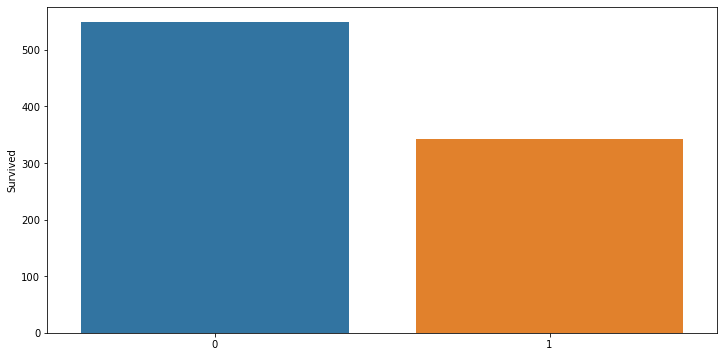

In [43]:
plt.figure(figsize = (12,6))
sns.barplot(x = titanic_train['Survived'].value_counts().keys(), y =  titanic_train['Survived'].value_counts());

Inference:  
It is clearly  seen that more people died as compare to a people who survived.

In [33]:
titanic_train['Pclass'].value_counts().sort_values(ascending = False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

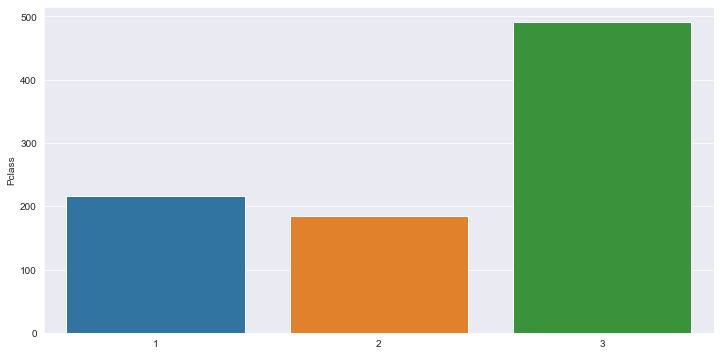

In [48]:
plt.figure(figsize = (12,6))
sns.set_style('darkgrid')
sns.barplot(x = titanic_train['Pclass'].value_counts().sort_values(ascending = False).keys(),
           y = titanic_train['Pclass'].value_counts().sort_values(ascending = False));
           

Inference:  
In first and second class passenger are equal & more than double are there in third class

In [49]:
titanic_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

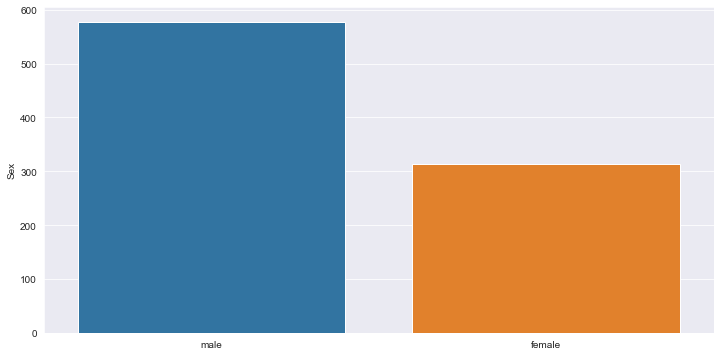

In [63]:
plt.figure(figsize = (12,6))
sns.barplot(x = titanic_train.Sex.value_counts().keys(), y =  titanic_train.Sex.value_counts());

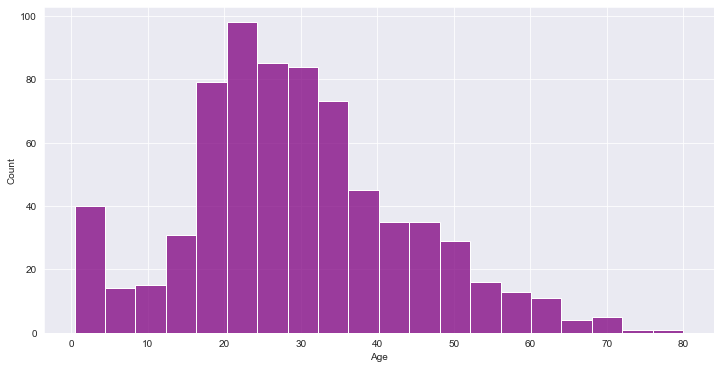

In [77]:
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.histplot(titanic_train.Age, color = 'purple');

Inference:  
large number portion of passenger had  age bwtween 20  t0 40.

## Training the model

In [162]:
X = titanic_train[['Age']]
y = titanic_train[['Survived']]

In [163]:
from sklearn.tree import DecisionTreeClassifier

In [164]:
model = DecisionTreeClassifier()

In [165]:
model.fit(X,y)

DecisionTreeClassifier()

In [166]:
titanic_test = titanic_test.dropna()

In [169]:
x_test = titanic_test[['Age']]

In [171]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
      dtype=int64)

In [173]:
submission = pd.DataFrame({'Age': titanic_test['Age'],
                         'Survived': y_pred})

In [175]:
submission.to_csv('titanic.csv', index = False)